Basic Operations on Images

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('disney.png')

In [5]:
px = img[100,100]
print (px)

[125 150 184]


In [8]:
blue = img[100,100,0]
print (blue)

125


In [4]:
img[100,100] = [255,255,255]
print (img[100,100])

[255 255 255]


In [5]:
img.item(10,10,2)

141

In [6]:
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [7]:
print (img.shape)

(349, 620, 3)


In [8]:
print (img.size)

649140


In [9]:
print(img.dtype)

uint8


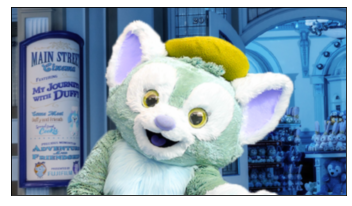

In [10]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [12]:
roi = img[10:100,10:100]
img[10:100,10:100] = roi

In [13]:
img.shape

(349, 620, 3)

In [14]:
roi.shape

(90, 90, 3)

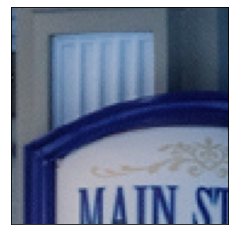

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(roi)
plt.xticks([]),plt.yticks([])
plt.show()

In [16]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

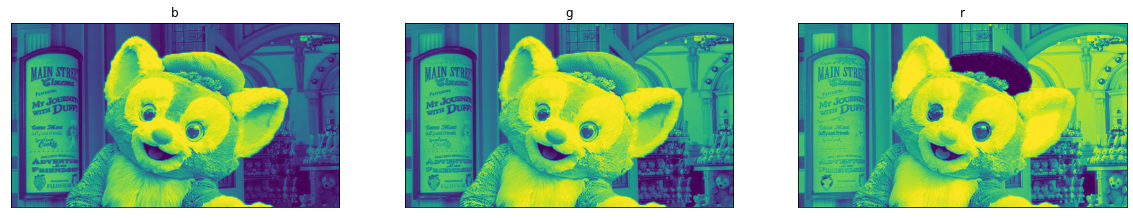

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(231),plt.imshow(b),plt.title('b')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.subplot(232),plt.imshow(g),plt.title('g')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.subplot(233),plt.imshow(r),plt.title('r')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

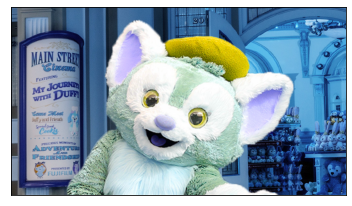

In [18]:
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

Splitting and Merging Image Channels

In [19]:
b,g,r = cv2.split(img)

In [29]:
b.shape

(349, 620)

In [30]:
b.shape

(349, 620)

In [31]:
g.shape

(349, 620)

In [32]:
r.shape

(349, 620)

Making Borders for Images (Padding)

In [33]:
img[:,:,0]

array([[76, 75, 78, ..., 43, 36, 26],
       [69, 76, 70, ..., 52, 52, 48],
       [73, 74, 76, ..., 67, 67, 63],
       ...,
       [53, 53, 52, ..., 36, 35, 39],
       [57, 49, 49, ..., 45, 45, 43],
       [51, 53, 50, ..., 47, 51, 44]], dtype=uint8)

In [35]:
img[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

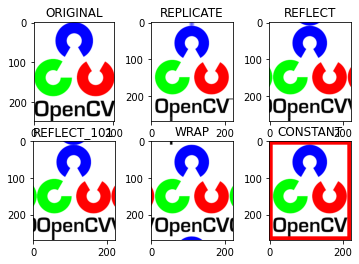

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


1.3.2 Arithmetic Operations on Images

In [39]:
x = np.uint8([250])

In [40]:
y = np.uint8([10])

In [41]:
x+y

array([4], dtype=uint8)

In [42]:
print(x+y)

[4]


In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [61]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')

In [62]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

In [63]:
def nothing(x):
    pass

In [69]:
cv2.namedWindow('image')
cv2.createTrackbar('weight','image',0,100,nothing)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
        weight = cv2.getTrackbarPos('weight','image')
        dst = cv2.addWeighted(img1,weight/100.,img2,1.-weight/100.,0)
cv2.destroyAllWindows()

In [70]:
img = np.zeros((400,512,3), np.uint8)
for i in range(255):
    img[:,i]=i
    img[:,256+i]=255-i

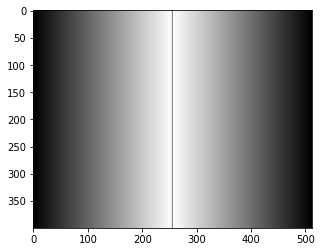

In [71]:
plt.imshow(img)
plt.show()

In [82]:
ret,mask = cv2.threshold(img,175,255, cv2.THRESH_BINARY)

In [83]:
ret 

175.0

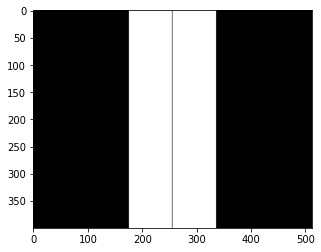

In [84]:
plt.imshow(mask)
plt.show()

In [86]:
mask_inv = cv2.bitwise_not(mask) #00000000(0)->11111111(255) 00001000(8)->11110111(2^7+2^6+2^5+2^4+2^2+2^1+2^0=)

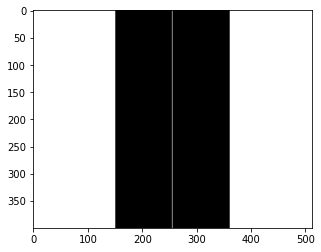

In [79]:
plt.imshow(mask_inv)
plt.show()

In [22]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')

In [23]:
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

In [24]:

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

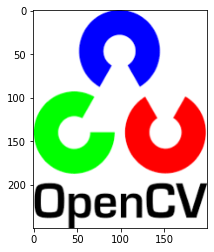

In [25]:
plt.imshow(img2)
plt.show()

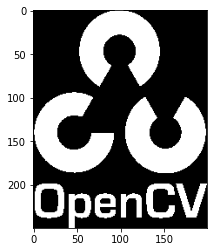

In [26]:
plt.imshow(mask_inv,cmap='gray')
plt.show()

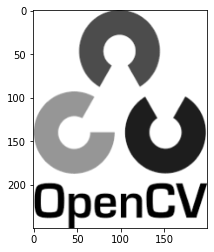

In [27]:
plt.imshow(img2gray,cmap='gray')
plt.show()

In [28]:
img2gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [123]:
# Take only region of logo from logo image.
img1_fg = cv2.bitwise_and(roi,roi,mask = mask)

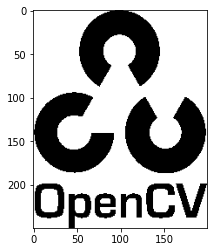

In [29]:
plt.imshow(mask,cmap='gray')
plt.show()

In [31]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

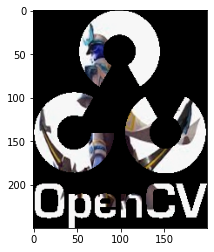

In [32]:
plt.imshow(img1_bg,cmap='gray')
plt.show()

In [33]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

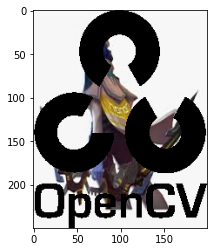

In [34]:
plt.imshow(img1_bg,cmap='gray')
plt.show()

In [35]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

In [36]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

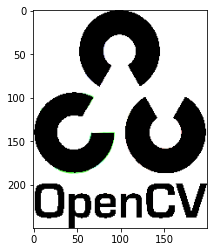

In [37]:
plt.imshow(img1,cmap='gray')
plt.show()